In [44]:
import pandas as pd

# GitHub에서 데이터 로드
url = "https://raw.githubusercontent.com/sventura/315-code-and-datasets/master/data/olive_oil.csv"
olive = pd.read_csv(url)

# 데이터 확인
olive.head()

,area,region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1,1,1075,75,226,7823,672,36,60,29
1,1,1,1088,73,224,7709,781,31,61,29
2,1,1,911,54,246,8113,549,31,63,29
3,1,1,966,57,240,7952,619,50,78,35
4,1,1,1051,67,259,7771,672,50,80,46


In [45]:
# 불필요 컬럼 삭제
olive.drop(['region'], axis=1, inplace=True)

# 데이터 분할
data = olive.drop(['area'], axis=1)
label = olive['area']

In [48]:
# 데이터 통계량 확인
data.describe()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


In [52]:
# 정규화 라이브러리 호출
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 정규화된 데이터 데이터프레임으로 변환
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,-0.930520,-0.974183,-0.078049,1.260932,-1.271825,0.317340,0.086416,0.903884
1,-0.853343,-1.012316,-0.132526,0.979767,-0.822501,-0.068541,0.131848,0.903884
2,-1.904132,-1.374576,0.466720,1.976178,-1.778859,-0.068541,0.222711,0.903884
3,-1.577616,-1.317377,0.303290,1.579093,-1.490303,1.397807,0.904189,1.330293
4,-1.073000,-1.126714,0.820820,1.132681,-1.271825,1.397807,0.995053,2.112044
...,...,...,...,...,...,...,...,...
567,0.286496,-0.306861,1.665212,0.439633,-0.785401,-1.689242,-2.185177,-1.014959
568,-1.019570,-0.497525,1.120443,1.056224,-0.702956,-1.689242,-2.185177,-0.943891
569,-1.316403,-0.688188,-0.513864,1.006897,-0.043399,-2.461005,-2.639496,-1.014959
570,-1.435136,-0.116198,0.575674,1.080888,-0.455622,-1.689242,-2.185177,-1.014959


## 2차원 t-SNE

In [54]:
# t-SNE를 진행하기 위한 라이브러리 호출
from sklearn.manifold import TSNE

# t-SNE 2차원 모델 생성 및 적용
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)
data_tsne

array([[ 9.156352 ,  3.7788188],
       [ 9.318748 ,  3.4389455],
       [ 9.649925 ,  5.2075567],
       ...,
       [41.07687  ,  6.1450553],
       [39.0368   ,  3.4418504],
       [37.280056 ,  5.155949 ]], dtype=float32)

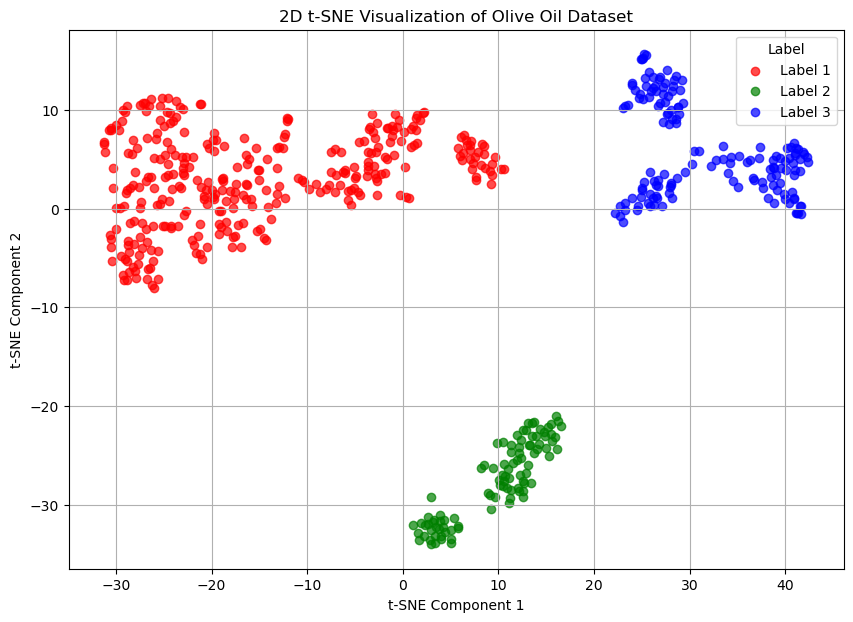

In [120]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.figure(figsize=(10, 7))

# 각 레이블별 산점도 생성
plt.scatter(data_tsne[label == 1, 0], data_tsne[label == 1, 1], color='red', alpha=0.7, label='Label 1')
plt.scatter(data_tsne[label == 2, 0], data_tsne[label == 2, 1], color='green', alpha=0.7, label='Label 2')
plt.scatter(data_tsne[label == 3, 0], data_tsne[label == 3, 1], color='blue', alpha=0.7, label='Label 3')

# 범례 추가
plt.legend(title="Label", loc='upper right')
plt.title('2D t-SNE Visualization of Olive Oil Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


## 3차원 t-SNE

In [136]:
# t-SNE 3차원 모델 생성 및 적용
tsne_3d = TSNE(n_components=3, random_state=42)
data_tsne_3d = tsne_3d.fit_transform(olive_scaled)  # 표준화된 데이터 사용
data_tsne_3d

array([[ 4.399678 ,  2.979532 ,  1.7113416],
       [ 4.149561 ,  2.801932 ,  1.6244692],
       [ 5.1994705,  3.0892608,  2.6471508],
       ...,
       [14.68386  , -3.1456301,  5.4006624],
       [13.066339 , -4.1619267,  4.0956936],
       [11.798339 , -3.310953 ,  4.72393  ]], dtype=float32)

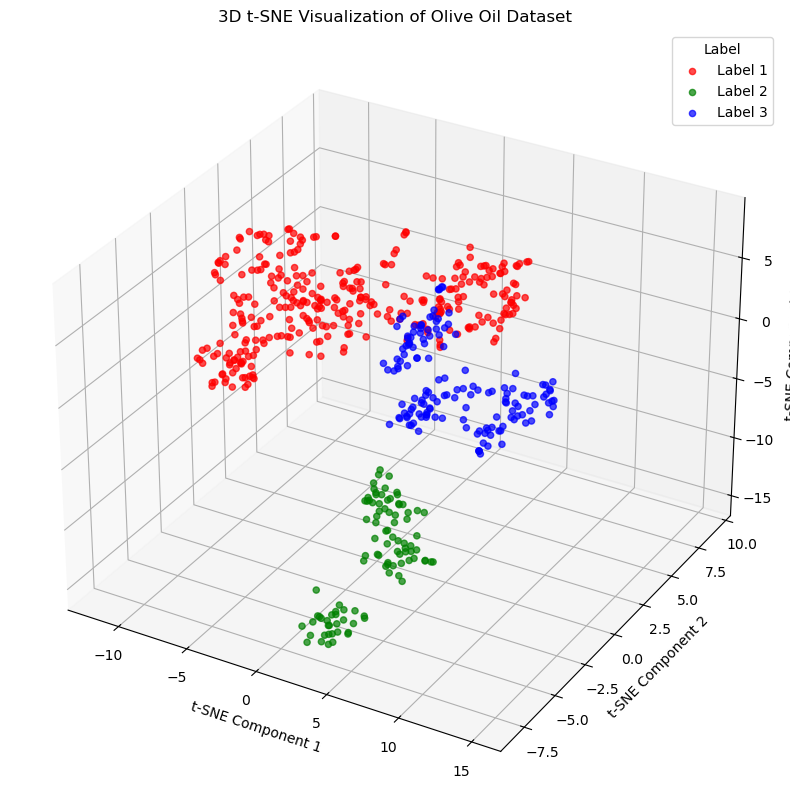

In [142]:
# 3D 시각화 라이브러리 호출
from mpl_toolkits.mplot3d import Axes3D

# 3D 시각화
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 레이블별로 산점도 추가
ax.scatter(data_tsne_3d[label == 1, 0], data_tsne_3d[label == 1, 1], data_tsne_3d[label == 1, 2], color='red', alpha=0.7, label='Label 1')
ax.scatter(data_tsne_3d[label == 2, 0], data_tsne_3d[label == 2, 1], data_tsne_3d[label == 2, 2], color='green', alpha=0.7, label='Label 2')
ax.scatter(data_tsne_3d[label == 3, 0], data_tsne_3d[label == 3, 1], data_tsne_3d[label == 3, 2], color='blue', alpha=0.7, label='Label 3')

# 그래프 제목 및 축 설정
ax.set_title('3D t-SNE Visualization of Olive Oil Dataset')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend(title="Label", loc='upper right')
plt.show()